# Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

1. Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 

2. Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

3. Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

4. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 

5. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

6. Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

- код, генерирующий выборки и графики;
- краткие описания каждого блока кода, объясняющие, что он делает;
- необходимые графики (убедитесь, что на них подписаны оси);
- выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
- выводы по результатам выполнения задания.

## Логнормальное распределение

https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

http://mathhelpplanet.com/static.php?p=osnovnye-zakony-raspredeleniya-nepreryvnyh-sluchainyh-velichin

Говорят, что случайная величина $X$ имеет логарифмически нормальное распределение (сокращённо логнормальное распределение), если её логарифм $\ln{X}=Y$ распределён нормально, то есть если $X=e^Y$, где величина $Y$ имеет нормальное распределение с параметрами $\mu$,$\sigma$.

Плотность логнормального распределения задаётся формулой


$f(x)=\frac{1}{x\sigma\sqrt{2\pi}}\exp\!\left(-\frac{(\ln{x}-\mu)^2}{2\sigma^2}\right)$, $x>0$

Данное распределение чаще всего используется для описания распределения поступления денежных средств (доходов), банковских вкладов, износа основных средств и т.д. 

## Гистограмма логнормального распределения для выборки n=1000

In [4]:
# подключим все необходимые модули

import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
%matplotlib inline

Сгенерируем из логнормального распределения выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины.

Обратим внимание, что scipy.stats.lognorm считает плотность логнормального распределения по формуле 

$f(x)=\frac{1}{x\sigma\sqrt{2\pi}}\exp\!\left(-\frac{(\ln{x})^2}{2\sigma^2}\right)$, т.е для $\mu = 0$, поэтому в функцию передается только один параметр - $\sigma$.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html

Text(0, 0.5, 'fraction of samples / $f(x)$')

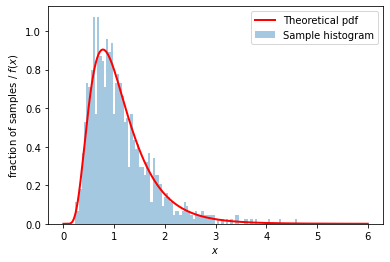

In [7]:
# сгенерируем выборку объема 1000 из логнормального распределения, зададим сигма = 0.5
lognorm_rv = sts.lognorm(0.5)
sample = lognorm_rv.rvs(1000)

# построим гистограмму по выборке
plt.hist(sample, bins=100, density=True, histtype='stepfilled', alpha=0.4, label='Sample histogram')

# поверх гистограммы построим теоретическую функцию плотности вероятности 
x = np.linspace(0,6,1000)
plt.plot(x, lognorm_rv.pdf(x),'r',lw=2, label='Theoretical pdf')
plt.legend(loc='best', frameon=True)
plt.xlabel('$x$')
plt.ylabel('fraction of samples / $f(x)$')

Получившаяся гистограмма по форме достаточно близко повторяет функцию плотности вероятности логнормального распределения. 
Это ожидаемый результат.

## Оценка распределения выборочного среднего случайной величины при разных объёмах выборок

Согласно Центральной Предельной Теореме выборочные средние $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ будут приближаться нормальным распределением $N(\mathbb{E}X, \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.

Для логнормального распределения матожидание равно ${\mathbb  {E}}X=e^{{\mu +{\sigma ^{2} \over 2}}}$, а дисперсия - ${\mathrm  {D}}X=\left(e^{{\sigma ^{2}}}-1\right)e^{{2\mu +\sigma ^{2}}}$ (напомним, что $\mu$,$\sigma$ в данной формуле - параметры нормального распределения случайной величины $Y$, такой, что $X=e^Y$).

Тогда распределение выборочных средних логнормального распределения будет приближаться нормальным распределением 

$N$($e^{{\mu +{\sigma ^{2} \over 2}}}$, $\frac{\left(e^{{\sigma ^{2}}}-1\right)e^{{2\mu +\sigma ^{2}}}}{n}$).

При этом выше мы обозначили, что в данном случае мы приняли $\mu=0$ и $\sigma=0.5$. Тогда матожидание нормального распределения, приближающего распределение выборочных средних, будет равно $e^{{0 +{0.5 ^{2} \over 2}}}\approx1.133$, а дисперсия будет равна $\frac{\left(e^{{0.5 ^{2}}}-1\right)e^{{2\cdot0 +0.5 ^{2}}}}{n}\approx\frac{0.365}{n}$. 

А т.к. в scipy.stats.norm распределение задается не через дисперсию, а через среднеквадратичное отклонение, то будем подставлять $\sqrt{DX/n}$, т.е. $\sqrt{\frac{0.365}{n}}$.

Оценим распределение выборочного среднего нашей случайной величины при разных объёмах выборок. Для этого построим гистограммы распределений выборочных средних для различных n, посчитаем значения параметров нормальных распределений, которыми, согласно ЦПТ, приближается распределение выборочных средних, и поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения. 

In [8]:
def generate_pdf(n): 
    
# сгенерируем выборочные средние по выборке объема n
    lognorm_rv = sts.lognorm(0.5)
    means = []
    for i in range(1000):
        sample = lognorm_rv.rvs(n)           # создаем выборку объема n
        sample_mean = sum(sample)/n          # находим выборочное среднее
        means.append(sample_mean)
    mean_of_sample_mean = sum(means)/1000    # считаем среднее по всем выборочным средним для сравнения с теоретическим МО
        
# расчитаем теоретическую плотность вероятности для нормального распределения, приближающего распределение выборочных средних
    mu = 1.133                               # теоретическое МО нормального распределения, приближающего выборочные средние
    sigma = (0.365/n)**0.5                   # теоретическое среднеквадратичное отклонение нормального распределения
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,3,1000)
    pdf = norm_rv.pdf(x)    
    
# построим гистограмму выборочных средних и наложим на нее теоретическую оценку плотности вероятности нормального распределения    
    plt.hist(means, bins=100,  density=True, alpha=0.4, label='Sample mean')
    plt.plot(x, pdf, 'r', lw=2, label='Normal pdf')
    plt.xlabel('$x$')
    plt.ylabel('fraction of samples / $f(x)$')
    plt.legend(loc='best', frameon=True)
    plt.title("n = %d, mean_of_sample_mean = '%.3f'" % (n, mean_of_sample_mean))
    plt.show()

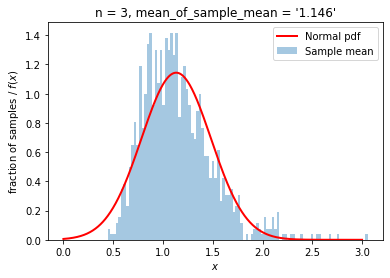

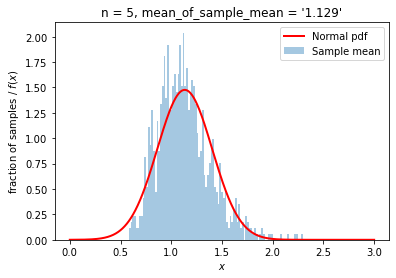

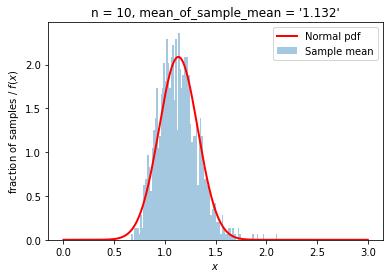

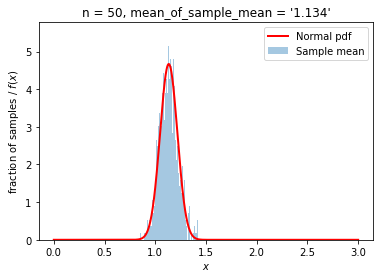

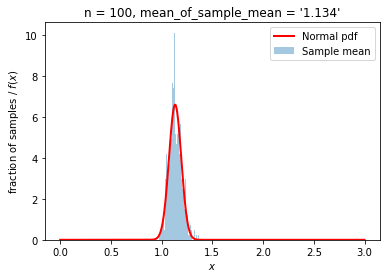

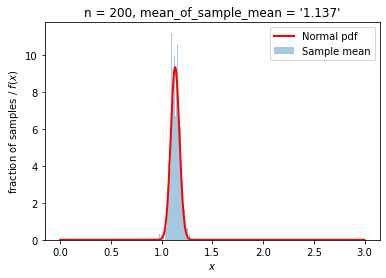

In [9]:
# нарисуем графики для различных n
for n in [3, 5, 10, 50, 100, 200]:
    generate_pdf(n)

Из графиков видно, что при увеличении числа n выборочные средние все гуще группируются вокруг матожидания нашей случайной величины ${\mathbb  {E}}X\approx1.133$, и разброс их значений становится все меньше. Если сравнивать с величиной $1.133$ средние выборочных средних при различных n, то видно, что при маленьких n разница между ними заметна (есть средние в $1.117$, $1.137$ и $1.143$), а при больших n средние выборочных средних скачут вокруг $1.133$ (есть средние в $1.131$ и $1.135$). 

Также при увеличении числа n гистограмма все лучше приближается нормальным распределением $N(\mathbb{E}X, \frac{\mathbb{D}X}{n})$. 

Таким образом, это наглядное подтверждение работы Центральной Предельной Теоремы.